# Electroencephalogram example

This dataset contains EEG recordings from human neonates. Multi-channel EEG was recorded from 79 term neonates admitted to the neonatal intensive care unit (NICU) at the Helsinki University Hospital. The median recording duration was 74 minutes (IQR: 64 to 96 minutes).

In [1]:
import numpy as np
import mogptk
import pandas as pd
import torch

# MOGP prediction on the sensor values

We use eight of the twenty two sensor's values as channel, leaving us with eight channels to fit using multi output Gaussian processes in order to find cross correlations between the channels. 

In [2]:
dataset_pd = pd.read_csv('data/eeg.csv',header=0,index_col=0)

dataset_pd.columns

cols = ['EEG Fp1-Ref','EEG Fp2-Ref','EEG Fz-Ref','EEG Cz-Ref','EEG T3-Ref','EEG T4-Ref','EEG O1-Ref','EEG O2-Ref']

t = dataset_pd['time'].values
y = dataset_pd[cols].values

data = mogptk.DataSet()
for i in range(len(cols)):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

np.random.seed(1)

for i, channel in enumerate(data):
    channel.transform(mogptk.TransformNormalize())
    channel.remove_randomly(pct=0.4)
    
    if i not in [0,1, 2, 3, 5, 7]:
        channel.remove_range(45, None)
        

# simulate sensor failure
data[0].remove_range(25, 35)
data[5].remove_range(None, 10)
data[7].remove_range(None, 10)        

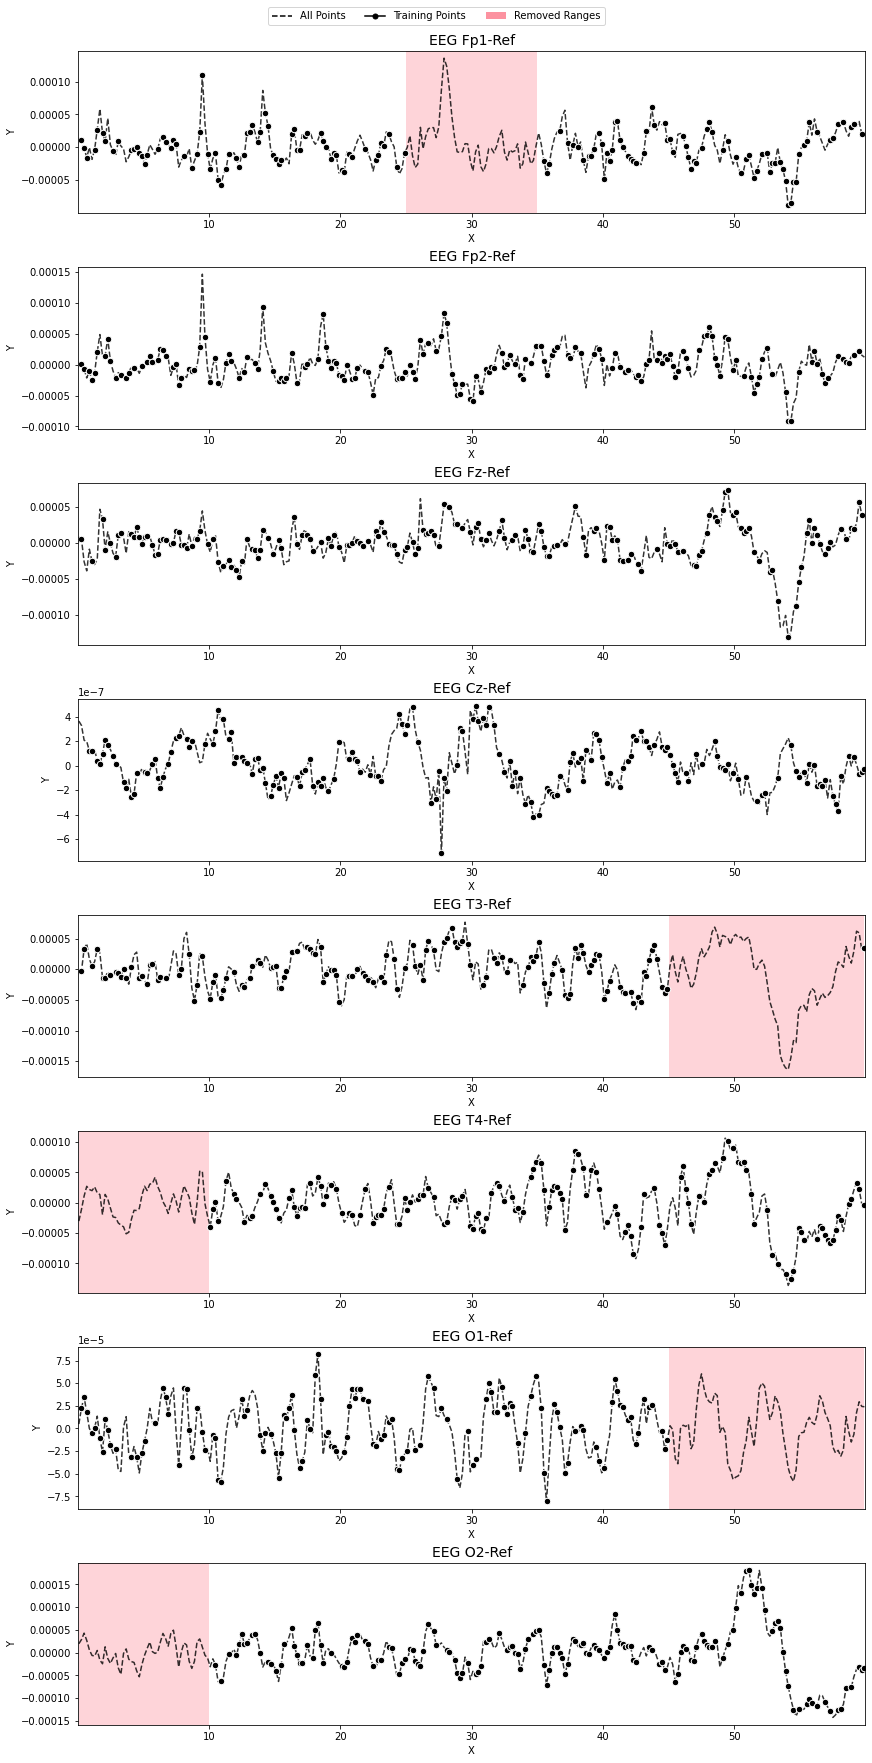

In [3]:
data.plot();

### Create model

In [7]:
model = mogptk.MOHSM(data, Q=2, P=2,rescale_x=True)

### Model training

In [8]:
model.init_parameters('BNSE')
model.train(method = 'Adam', lr = 0.1, iters = 400, verbose = True, error='MAE')


Starting optimization using Adam
‣ Model: MOHSM
‣ Channels: 8
‣ Mixtures: 2
‣ Training points: 1265
‣ Parameters: 168
‣ Initial loss: 1.27e+03
‣ Initial error: 0.279

Start Adam:
    0/400   0:00:00  loss=   1266.46  error=  0.278723
    4/400   0:00:09  loss=    1241.5  error=  0.269524
    8/400   0:00:19  loss=   1215.34  error=  0.251726
   12/400   0:00:29  loss=   1189.77  error=  0.238995
   16/400   0:00:39  loss=   1165.43  error=  0.232649
   20/400   0:00:49  loss=   1142.28  error=  0.230326
   24/400   0:00:59  loss=   1119.36  error=  0.228361
   28/400   0:01:08  loss=   1096.24  error=  0.226082
   32/400   0:01:18  loss=   1073.22  error=  0.223726
   36/400   0:01:28  loss=   1050.46  error=  0.221748
   40/400   0:01:38  loss=   1027.86  error=  0.220703
   44/400   0:01:48  loss=   1005.34  error=  0.219722
   48/400   0:01:57  loss=   982.862  error=   0.21825
   52/400   0:02:07  loss=   960.547  error=  0.216606
   56/400   0:02:17  loss=   938.331  error=  0.21

(array([ 1.26646346e+03,  1.26046373e+03,  1.25429602e+03,  1.24796223e+03,
         1.24149953e+03,  1.23497078e+03,  1.22841858e+03,  1.22186899e+03,
         1.21534348e+03,  1.20886101e+03,  1.20243233e+03,  1.19606568e+03,
         1.18977108e+03,  1.18355698e+03,  1.17742760e+03,  1.17138542e+03,
         1.16543090e+03,  1.15955889e+03,  1.15375633e+03,  1.14800343e+03,
         1.14227820e+03,  1.13656204e+03,  1.13084233e+03,  1.12511127e+03,
         1.11936430e+03,  1.11359998e+03,  1.10782041e+03,  1.10203118e+03,
         1.09624064e+03,  1.09045820e+03,  1.08469172e+03,  1.07894508e+03,
         1.07321775e+03,  1.06750719e+03,  1.06181143e+03,  1.05612925e+03,
         1.05045884e+03,  1.04479762e+03,  1.03914377e+03,  1.03349707e+03,
         1.02785768e+03,  1.02222451e+03,  1.01659477e+03,  1.01096543e+03,
         1.00533550e+03,  9.99706882e+02,  9.94083147e+02,  9.88467627e+02,
         9.82862476e+02,  9.77268660e+02,  9.71685946e+02,  9.66112874e+02,
         9.6

### Prediction

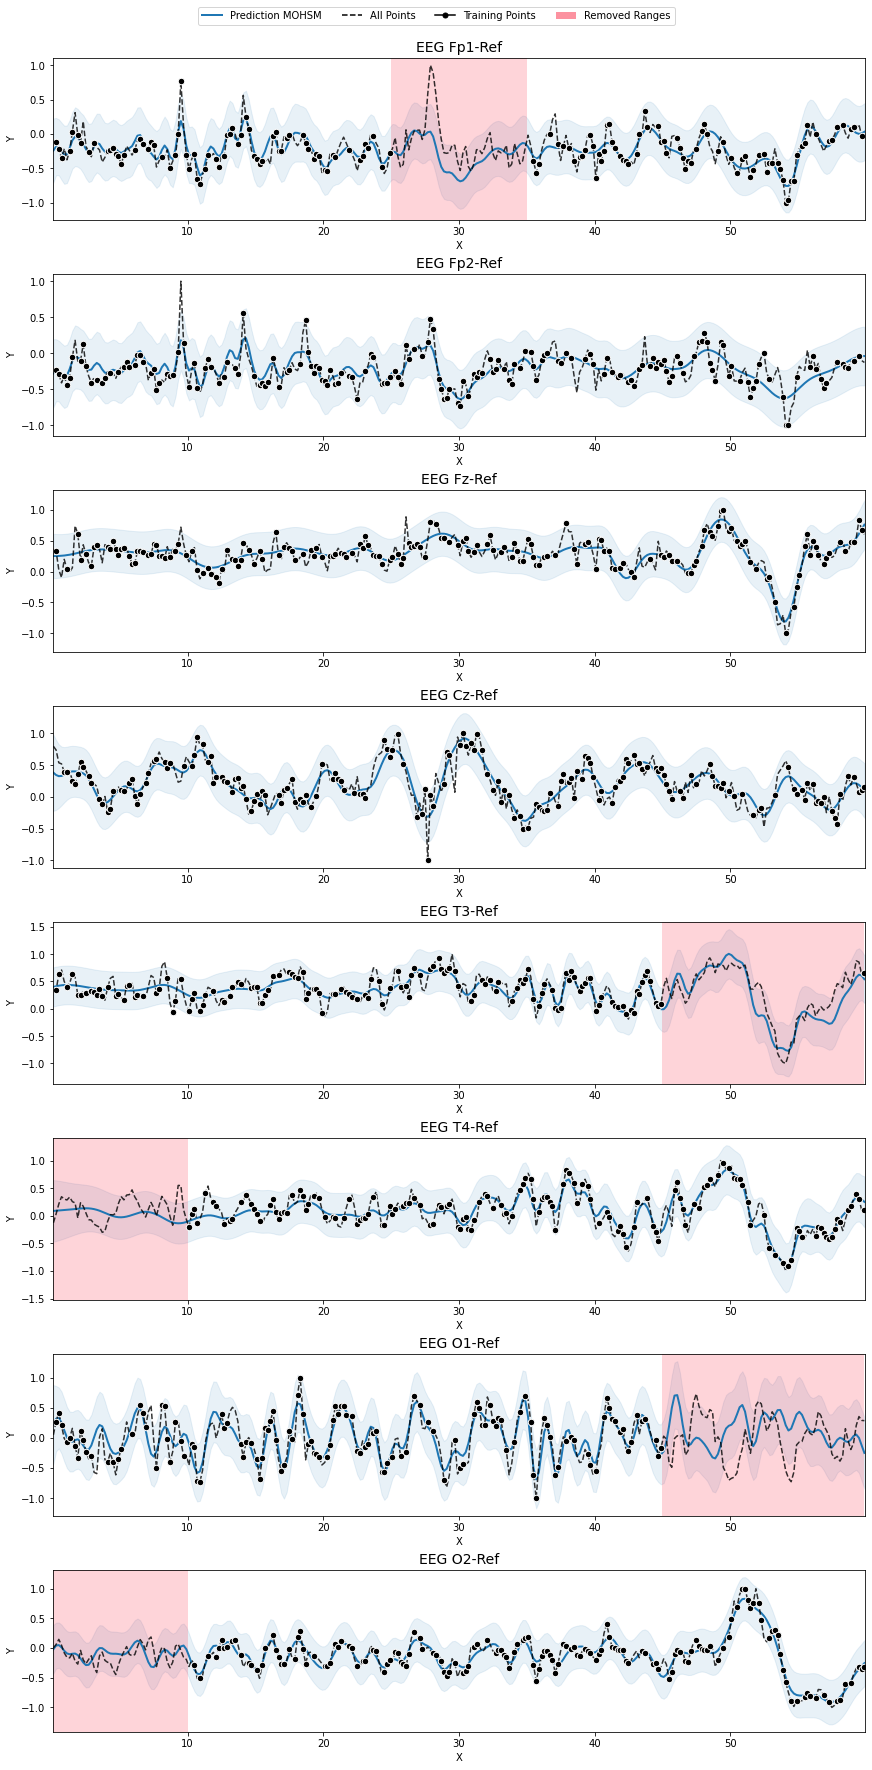

In [9]:
model.predict()
model.plot_prediction(transformed=True);